
=== p = 0.4 ===
n=    10: coverage = 0.9985 ± 0.0004
n=   100: coverage = 0.9944 ± 0.0007
n=  1000: coverage = 0.9921 ± 0.0009
n= 10000: coverage = 0.9934 ± 0.0008

=== p = 0.5 ===
n=    10: coverage = 0.9978 ± 0.0005
n=   100: coverage = 0.9938 ± 0.0008
n=  1000: coverage = 0.9933 ± 0.0008
n= 10000: coverage = 0.9942 ± 0.0008


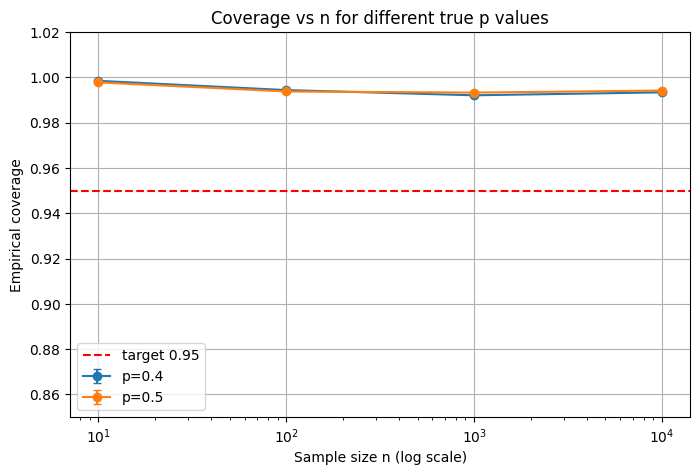

In [75]:
import numpy as np
import matplotlib.pyplot as plt

p_values = [0.4, 0.5]
alpha = 0.05
n_values = [10, 100, 1000, 10000]
num_simulations = 10000

def empirical_coverage(n, p_true, num_sim):
    eps = np.sqrt(np.log(2/alpha) / (2*n))
    count = 0
    for _ in range(num_sim):
        sample = np.random.binomial(1, p_true, n)
        phat = sample.mean()
        if (phat - eps) <= p_true <= (phat + eps):
            count += 1
    q = count / num_sim
    se = np.sqrt(q * (1 - q) / num_sim)   # Monte Carlo SE for coverage estimate
    return q, se

results = {}
for p in p_values:
    qs, ses = [], []
    print(f"\n=== p = {p} ===")
    for n in n_values:
        q, se = empirical_coverage(n, p, num_simulations)
        qs.append(q); ses.append(se)
        print(f"n={n:6d}: coverage = {q:.4f} ± {se:.4f}")
    results[p] = (qs, ses)

# Plot both curves with error bars
plt.figure(figsize=(8,5))
for p in p_values:
    qs, ses = results[p]
    plt.errorbar(n_values, qs, yerr=ses, marker='o', capsize=3, label=f"p={p}")
plt.axhline(1-alpha, color='red', linestyle='--', label=f"target {1-alpha:.2f}")
plt.xscale('log')
plt.ylim(0.85, 1.02)
plt.xlabel('Sample size n (log scale)')
plt.ylabel('Empirical coverage')
plt.title('Coverage vs n for different true p values')
plt.legend()
plt.grid(True)
plt.show()
